In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from sklearn.datasets import load_breast_cancer

# Cargar los datos
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualizar las primeras filas del DataFrame
print(df.head())

# Usaremos la base de datos de Breast Cancer Wisconsin, que contiene características de células tumorales y un objetivo binario que indica si el tumor es maligno o benigno.


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [19]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [20]:
X = df.drop('target', axis=1)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [47]:
scaler.fit_transform(X_test)

array([[-0.4877952 , -0.25088379, -0.46378664, ..., -0.21989091,
         0.23083947,  0.17173277],
       [ 1.37325734,  0.36318719,  1.29254295, ...,  0.93019499,
        -0.58958803, -0.972629  ],
       [ 0.37225845, -0.05148067,  0.38772954, ...,  0.52157274,
        -0.08280128, -0.21536971],
       ...,
       [-0.76105639, -1.08248546, -0.76208585, ..., -0.30042664,
        -0.3893541 , -0.32657562],
       [ 0.01558068,  1.84511495,  0.00969106, ..., -0.50681802,
        -1.76086788, -0.33345979],
       [ 1.88813896,  2.58607883,  1.79246268, ...,  0.73702811,
        -0.02786985, -0.10998887]])

In [46]:
scaler.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [45]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [21]:
# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir los resultados del conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



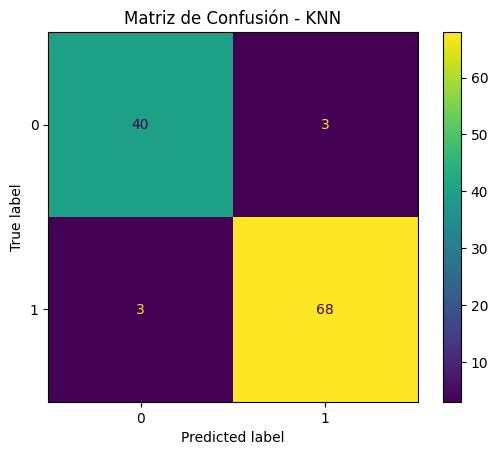

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title('Matriz de Confusión - KNN')
plt.show()


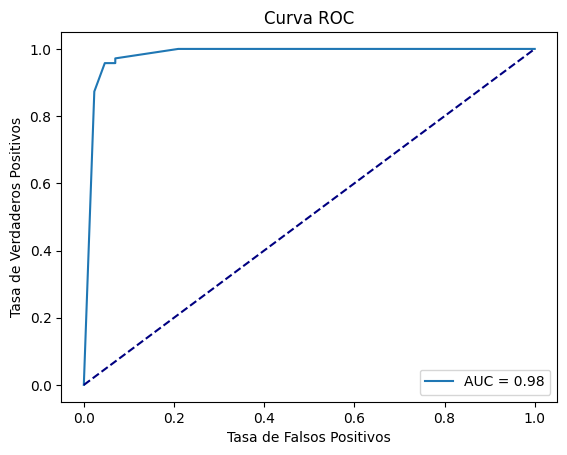

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades de predicción
y_prob = knn.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


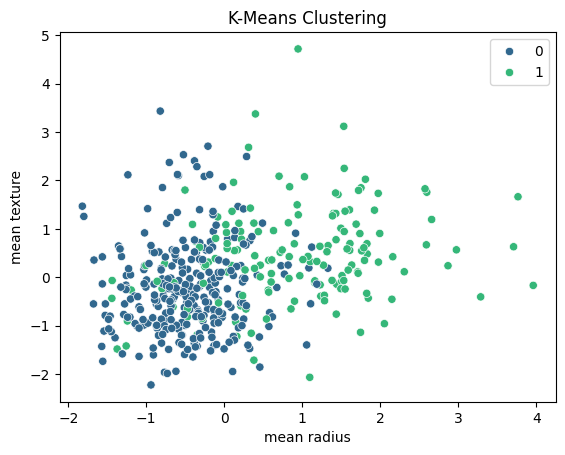

In [22]:
# Aplicar K-Means a los datos estandarizados
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Asignar los clusters a los datos de entrenamiento
clusters = kmeans.labels_

# Visualizar los clusters
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=clusters, palette='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('K-Means Clustering')
plt.show()


In [23]:
# Comparar los clusters con las etiquetas reales
comparison = pd.DataFrame({'Clusters': clusters, 'Real Labels': y_train})
print(comparison.groupby(['Clusters', 'Real Labels']).size())


Clusters  Real Labels
0         0               30
          1              269
1         0              139
          1               17
dtype: int64


In [33]:
#Cluster 
from sklearn.cluster import AgglomerativeClustering

In [30]:
# Cargar los datos
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

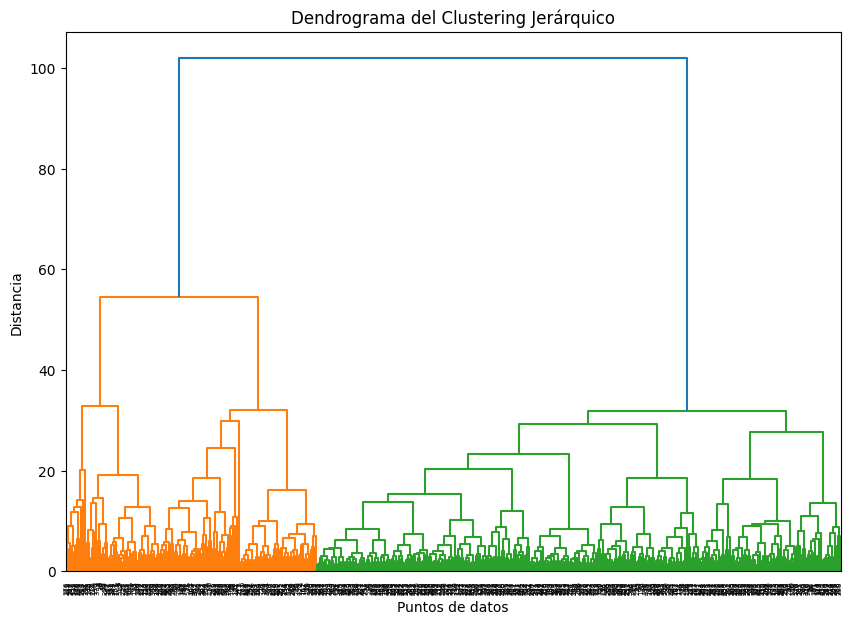

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
# Realizar el clustering jerárquico
linked = linkage(df_scaled, method='ward')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()


In [35]:
# Aplicar clustering jerárquico aglomerativo
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_labels = cluster.fit_predict(df_scaled)

# Añadir las etiquetas de cluster al DataFrame
df['cluster'] = cluster_labels

# Visualizar la distribución de los clusters
print(df['cluster'].value_counts())


cluster
1    385
0    184
Name: count, dtype: int64


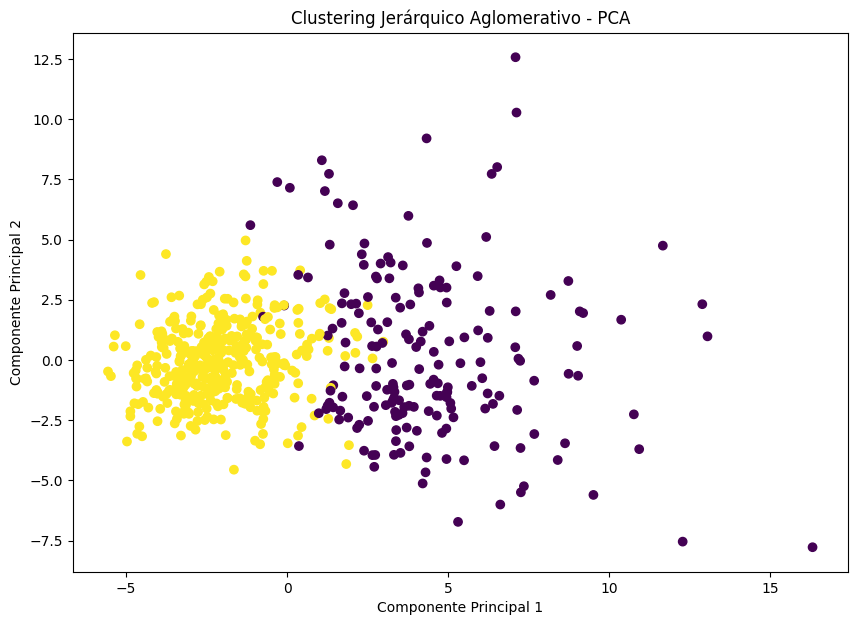

In [36]:
    from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Visualizar los clusters
plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering Jerárquico Aglomerativo - PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
